In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = (224, 224)
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, IMAGE_SIZE)
    img = (img / 255.0 * 255).astype('uint8')
    return img

In [3]:
# Specify input and output directories
srk_input_directory = "C:\\Users\\govind kannan\\Desktop\\dataset\\SRK"
srk_data = "C:\\Users\\govind kannan\\Desktop\\dataset\\resized\\SRK"

# Ensure the output directory exists, create if not
if not os.path.exists(srk_data):
    os.makedirs(srk_data)

# Define the target size for the resized images
target_width = 300
target_height = 200

# Loop through the input directory
for filename in os.listdir(srk_input_directory):
    input_path = os.path.join(srk_input_directory, filename)
    output_path = os.path.join(srk_data, filename)
    resized_img=preprocess_image(input_path)
    # Save the resized image to the output directory
    cv2.imwrite(output_path, resized_img)
    print(f"Resized and saved {filename} to {srk_data}")

print("Resizing and saving completed.")

Resized and saved 0981f64acae072c10303fb8db331cdf0.jpg to C:\Users\govind kannan\Desktop\dataset\resized\SRK
Resized and saved 1312e484e5353573c0a88cd9410b106c.jpg to C:\Users\govind kannan\Desktop\dataset\resized\SRK
Resized and saved 153c89e17bf6214428e8184b55693e4b.jpg to C:\Users\govind kannan\Desktop\dataset\resized\SRK
Resized and saved 17204f4fabc4cf8d3f437951995242de.jpg to C:\Users\govind kannan\Desktop\dataset\resized\SRK
Resized and saved 24e995a4793b332081597d686d4b88bc.jpg to C:\Users\govind kannan\Desktop\dataset\resized\SRK
Resized and saved 29f8158fdcc6d590f2e4c3df66a893f0.jpg to C:\Users\govind kannan\Desktop\dataset\resized\SRK
Resized and saved 6ed28cdbfc9df360374bdd10f6f3e3ae.jpg to C:\Users\govind kannan\Desktop\dataset\resized\SRK
Resized and saved 749b7e94095228b044a9b763ee741c5e.jpg to C:\Users\govind kannan\Desktop\dataset\resized\SRK
Resized and saved 7620902491d3c1456476a4327cb39a11.jpg to C:\Users\govind kannan\Desktop\dataset\resized\SRK
Resized and saved 8

In [4]:
# Specify input and output directories
Vijay_input_directory = "C:\\Users\\govind kannan\\Desktop\\dataset\\Vijay"
Vijay_data = "C:\\Users\\govind kannan\\Desktop\\dataset\\resized\\Vijay"

# Ensure the output directory exists, create if not
if not os.path.exists(Vijay_data):
    os.makedirs(Vijay_data)

# Define the target size for the resized images
target_width = 300
target_height = 200

# Loop through the input directory
for filename in os.listdir(Vijay_input_directory):
    input_path = os.path.join(Vijay_input_directory, filename)
    output_path = os.path.join(Vijay_data, filename)
    resized_img=preprocess_image(input_path)
    # Save the resized image to the output directory
    cv2.imwrite(output_path, resized_img)
    print(f"Resized and saved {filename} to {Vijay_data}")

print("Resizing and saving completed.")

Resized and saved 012bb25f6f0e323821c44311cb8b6b7f.jpg to C:\Users\govind kannan\Desktop\dataset\resized\Vijay
Resized and saved 01c4ed4f9cbc62a0ba722df91e4e8dcd.jpg to C:\Users\govind kannan\Desktop\dataset\resized\Vijay
Resized and saved 01c764512f0cfcdf2aaeae4e45489cb5.jpg to C:\Users\govind kannan\Desktop\dataset\resized\Vijay
Resized and saved 0428b085e6f9d7190ceca6ec2d6cbce5.jpg to C:\Users\govind kannan\Desktop\dataset\resized\Vijay
Resized and saved 0787674ec1342e8cb188a5c6fbfe72b3.jpg to C:\Users\govind kannan\Desktop\dataset\resized\Vijay
Resized and saved 0a88ad73ff224fdc4c3d88a171418d09.jpg to C:\Users\govind kannan\Desktop\dataset\resized\Vijay
Resized and saved 105a74e031a2649dae41905fdc4c8ddf.jpg to C:\Users\govind kannan\Desktop\dataset\resized\Vijay
Resized and saved 13ce57b04185b5e679ce1ea455096026.jpg to C:\Users\govind kannan\Desktop\dataset\resized\Vijay
Resized and saved 19214b205f0ba2ebe4c1fe28b7c167cb.jpg to C:\Users\govind kannan\Desktop\dataset\resized\Vijay
R

In [22]:
import os
import shutil
import random

# Define the paths to your SRK and Vijay image folders
srk_folder = "C:\\Users\\govind kannan\\Desktop\\dataset\\resized\\SRK"
vijay_folder = "C:\\Users\\govind kannan\\Desktop\\dataset\\resized\\Vijay"

# Define the paths for your training and testing folders
train_folder = "C:\\Users\\govind kannan\\Desktop\\dataset\\train_folder"
test_folder = "C:\\Users\\govind kannan\\Desktop\\dataset\\test_folder"

# Create testing and training directories if they don't exist
if not os.path.exists(train_folder):
    os.makedirs(train_folder)
if not os.path.exists(test_folder):
    os.makedirs(test_folder)

# Function to split the dataset
def split_dataset(src_folder, train_dest_folder, test_dest_folder, test_ratio):
    # Create subdirectories for each class in the training and testing folders
    train_class_folder = os.path.join(train_dest_folder, os.path.basename(src_folder))
    test_class_folder = os.path.join(test_dest_folder, os.path.basename(src_folder))

    if not os.path.exists(train_class_folder):
        os.makedirs(train_class_folder)
    if not os.path.exists(test_class_folder):
        os.makedirs(test_class_folder)

    # List all files in the source folder
    files = os.listdir(src_folder)

    # Calculate the number of files to move to the test set
    num_files = len(files)
    num_test_files = int(num_files * test_ratio)

    # Randomly shuffle the list of files
    random.shuffle(files)

    # Split the files into training and testing sets
    test_files = files[:num_test_files]
    train_files = files[num_test_files:]

    # Copy files to their respective destinations
    for file in test_files:
        src_path = os.path.join(src_folder, file)
        dest_path = os.path.join(test_class_folder, file)
        shutil.copy(src_path, dest_path)

    for file in train_files:
        src_path = os.path.join(src_folder, file)
        dest_path = os.path.join(train_class_folder, file)
        shutil.copy(src_path, dest_path)

# Split the SRK dataset with an 80/20 split
split_dataset(srk_folder, train_folder, test_folder, 0.20)

# Split the Vijay dataset with an 80/20 split
split_dataset(vijay_folder, train_folder, test_folder, 0.20)


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Define the directory paths for your dataset
train_data_dir = "C:\\Users\\govind kannan\\Desktop\\dataset\\train_folder"
test_data_dir = "C:\\Users\\govind kannan\\Desktop\\dataset\\test_folder"

# Create data generators with data augmentation for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Create a more complex model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

# Train the model
epochs = 50  # Increase the number of epochs

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Evaluate the model
evaluation = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

# Save the trained model
model.save('Model_srk_vijay.h5')


Found 192 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


Epoch 1/50
6/6 [==============================] - 12s 2s/step - loss: 1.5305 - accuracy: 0.4948 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 2/50
6/6 [==============================] - 9s 1s/step - loss: 0.6888 - accuracy: 0.5208 - val_loss: 0.6833 - val_accuracy: 0.5625
Epoch 3/50
6/6 [==============================] - 9s 1s/step - loss: 0.6713 - accuracy: 0.6094 - val_loss: 0.7061 - val_accuracy: 0.5000
Epoch 4/50
6/6 [==============================] - 9s 1s/step - loss: 0.7202 - accuracy: 0.5885 - val_loss: 0.7886 - val_accuracy: 0.5000
Epoch 5/50
6/6 [==============================] - 9s 1s/step - loss: 0.7046 - accuracy: 0.5521 - val_loss: 0.6663 - val_accuracy: 0.5625
Epoch 6/50
6/6 [==============================] - 9s 1s/step - loss: 0.6608 - accuracy: 0.5625 - val_loss: 0.7605 - val_accuracy: 0.5208
Epoch 7/50
6/6 [==============================] - 9s 1s/step - loss: 0.6581 - accuracy: 0.5938 - val_loss: 0.7376 - val_accuracy: 0.4583
Epoch 8/50
6/6 [========================

C:\Users\govind kannan\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 1s 156ms/step
Accuracy: 0.33
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.42      0.38        24
           1       0.30      0.25      0.27        24

    accuracy                           0.33        48
   macro avg       0.33      0.33      0.33        48
weighted avg       0.33      0.33      0.33        48

Confusion Matrix:
[[10 14]
 [18  6]]


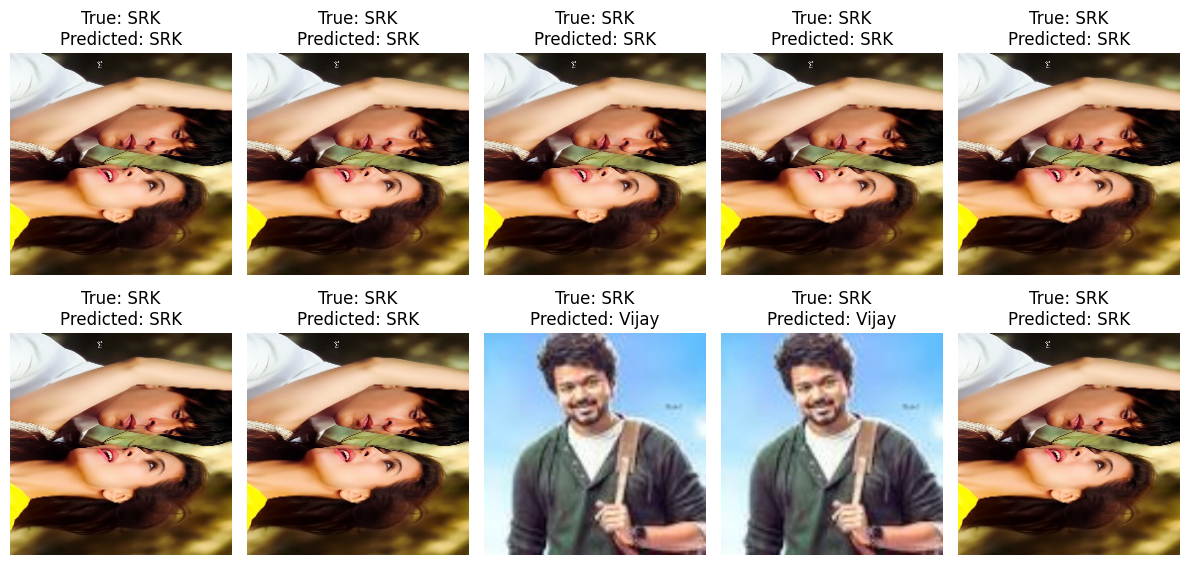

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("Model_srk_vijay.h5")

# Generate predictions on the test dataset
test_generator.reset()  # Reset the generator to the beginning
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.round(predictions).flatten()

# Get true labels
true_labels = test_generator.classes

# Calculate evaluation metrics
accuracy = np.mean(predicted_classes == true_labels)
report = classification_report(true_labels, predicted_classes)
confusion = confusion_matrix(true_labels, predicted_classes)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion)

# Visualize model predictions and misclassifications
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.ravel()):
    idx = np.random.randint(0, len(test_generator))
    img = test_generator[idx][0][0]  # Get a random test image
    true_label = true_labels[idx]
    predicted_label = predicted_classes[idx]
    label_names = test_generator.class_indices  # Get class names from the generator
    class_names = list(label_names.keys())
    
    ax.imshow(img)
    ax.set_title(f"True: {class_names[true_label]}\nPredicted: {class_names[int(predicted_label)]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


2/2 [==============================] - 1s 147ms/step
Accuracy: 0.46
Precision: 0.45
Recall: 0.38
F1-Score: 0.41
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.54      0.50        24
           1       0.45      0.38      0.41        24

    accuracy                           0.46        48
   macro avg       0.46      0.46      0.45        48
weighted avg       0.46      0.46      0.45        48

Confusion Matrix:
[[13 11]
 [15  9]]


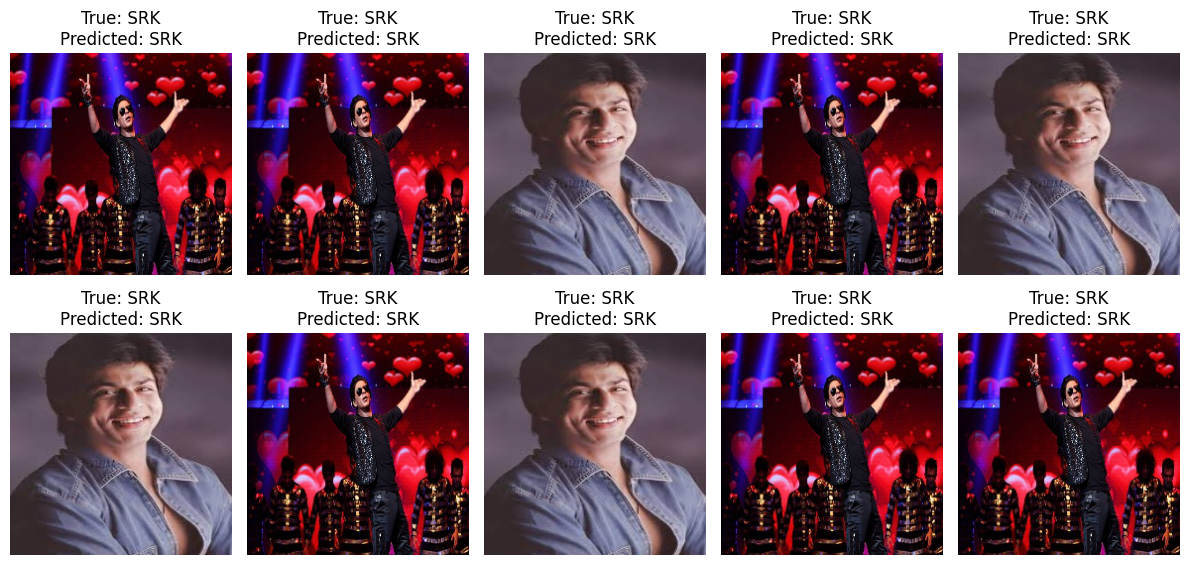

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("Model_srk_vijay.h5")

# Generate predictions on the test dataset
test_generator.reset()  # Reset the generator to the beginning
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.round(predictions).flatten()

# Get true labels
true_labels = test_generator.classes

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_classes)
precision = precision_score(true_labels, predicted_classes)
recall = recall_score(true_labels, predicted_classes)
f1 = f1_score(true_labels, predicted_classes)
report = classification_report(true_labels, predicted_classes)
confusion = confusion_matrix(true_labels, predicted_classes)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion)

# Visualize model predictions and misclassifications
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.ravel()):
    idx = np.random.randint(0, len(test_generator))
    img = test_generator[idx][0][0]  # Get a random test image
    true_label = true_labels[idx]
    predicted_label = predicted_classes[idx]
    label_names = test_generator.class_indices  # Get class names from the generator
    class_names = list(label_names.keys())
    
    ax.imshow(img)
    ax.set_title(f"True: {class_names[true_label]}\nPredicted: {class_names[int(predicted_label)]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [44]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("Model_srk_vijay.h5")

# Define class names
class_names = ["SRK", "Vijay"]

# Define the path to the image you want to classify
image_path = "C:\\Users\\govind kannan\\Desktop\\images (1).jpeg"  # Replace with the path to your image

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Normalize the pixel values

# Make predictions
predictions = model.predict(img)

# Decode the predictions (assuming binary classification)
predicted_class_index = int(predictions[0][0] + 0.5)  # Round to the nearest integer (0 or 1)
predicted_class = class_names[predicted_class_index]

# Print the prediction
print(f"The image is predicted to be: {predicted_class}")


1/1 [==============================] - 0s 278ms/step
The image is predicted to be: Vijay
